In [107]:
import pandas as pd
import numpy as np
import seaborn as sns

In [108]:
df = pd.read_csv("Ecommerce_Product_Data_Cleaned.csv")
df.head(2)

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n,cost_of_the_product_cleaned,discount_offered_cleaned,weight_in_gms_cleaned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Medium_cost,Too Much,Light
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Medium_cost,Too Much,Heavy


In [109]:
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n', 'cost_of_the_product_cleaned',
       'discount_offered_cleaned', 'weight_in_gms_cleaned'],
      dtype='object')

In [110]:
#sns.scatterplot(x=df['cost_of_the_product'], y=df['prior_purchases'])  # both quatitive scatter plot

In [111]:
#sns.scatterplot(x=df['prior_purchases'], y=df['weight_in_gms']) 

In [112]:
df.dtypes

id                              int64
warehouse_block                object
mode_of_shipment               object
customer_care_calls             int64
customer_rating                 int64
cost_of_the_product             int64
prior_purchases                 int64
product_importance             object
gender                         object
discount_offered                int64
weight_in_gms                   int64
reached.on.time_y.n             int64
cost_of_the_product_cleaned    object
discount_offered_cleaned       object
weight_in_gms_cleaned          object
dtype: object

In [113]:
#df["revenue_before_disc"] = df["cost_of_the_product"] * df["weight_in_gms"]
#df["revenue_before_disc"]

In [114]:
#df["revenue_after_disc"] = (df["revenue_before_disc"]*(100-df['discount_offered'])/100)
#df["revenue_after_disc"] 

In [115]:
maxcostproduct = df['cost_of_the_product'].max()
maxcostproduct


310

In [116]:
maxpurchases = df['prior_purchases'].max()
maxpurchases

10

In [117]:
maxweight = df['weight_in_gms'].max()
maxweight

7846

In [118]:
mincostproduct = df['cost_of_the_product'].min()
mincostproduct

96

In [119]:
minpurchases = df['prior_purchases'].min()
minpurchases

2

In [120]:
minweight = df['weight_in_gms'].min()
minweight

1001

In [121]:
cost_of_the_product_on_time = df.groupby("reached.on.time_y.n")["cost_of_the_product"].mean()
cost_of_the_product_on_time

reached.on.time_y.n
0    214.498647
1    207.289197
Name: cost_of_the_product, dtype: float64

In [122]:
discount_offered_on_time = df.groupby("reached.on.time_y.n")["discount_offered"].mean()
discount_offered_on_time

reached.on.time_y.n
0     5.545987
1    18.663721
Name: discount_offered, dtype: float64

In [123]:
weight_in_gms_on_time = df.groupby("reached.on.time_y.n")["weight_in_gms"].mean()
weight_in_gms_on_time

reached.on.time_y.n
0    4168.668395
1    3272.640104
Name: weight_in_gms, dtype: float64

In [124]:
customer_rating_on_time = df.groupby("reached.on.time_y.n")["customer_rating"].mean()
customer_rating_on_time

reached.on.time_y.n
0    2.967989
1    3.005790
Name: customer_rating, dtype: float64

In [125]:
df.groupby(["reached.on.time_y.n","mode_of_shipment"])["prior_purchases"].mean()

reached.on.time_y.n  mode_of_shipment
0                    Flight              3.738701
                     Road                3.689655
                     Ship                3.649684
1                    Flight              3.452760
                     Road                3.505314
                     Ship                3.507289
Name: prior_purchases, dtype: float64

In [126]:
df.groupby(["reached.on.time_y.n","mode_of_shipment"])["cost_of_the_product"].mean()

reached.on.time_y.n  mode_of_shipment
0                    Flight              213.408192
                     Road                215.394483
                     Ship                214.539461
1                    Flight              206.590271
                     Road                207.029952
                     Ship                207.516932
Name: cost_of_the_product, dtype: float64

In [127]:
df.groupby(["reached.on.time_y.n","mode_of_shipment"])["customer_rating"].mean()

reached.on.time_y.n  mode_of_shipment
0                    Flight              2.975989
                     Road                2.988966
                     Ship                2.961039
1                    Flight              2.986904
                     Road                3.000000
                     Ship                3.011662
Name: customer_rating, dtype: float64

In [128]:
df.groupby(["reached.on.time_y.n","mode_of_shipment"])["weight_in_gms"].mean()

reached.on.time_y.n  mode_of_shipment
0                    Flight              4116.878531
                     Road                4122.776552
                     Ship                4191.958042
1                    Flight              3306.506080
                     Road                3318.063768
                     Ship                3253.977573
Name: weight_in_gms, dtype: float64

In [129]:
df.groupby(["reached.on.time_y.n","warehouse_block"])["customer_rating"].mean()

reached.on.time_y.n  warehouse_block
0                    A                  2.930079
                     B                  2.980796
                     C                  2.956698
                     D                  3.033875
                     F                  2.953804
1                    A                  2.976744
                     B                  2.980072
                     C                  3.019196
                     D                  3.007299
                     F                  3.025524
Name: customer_rating, dtype: float64

In [130]:
grouped_by_warehouse = df.groupby('warehouse_block').agg({
    'cost_of_the_product': 'mean',
    'customer_care_calls': 'sum',
    'prior_purchases': 'sum',
    'discount_offered': 'mean',
    'weight_in_gms': 'mean',
    "product_importance": "first", 'customer_rating': 'first' 
}).reset_index()
grouped_by_warehouse

,warehouse_block,cost_of_the_product,customer_care_calls,prior_purchases,discount_offered,weight_in_gms,product_importance,customer_rating
0,A,208.767594,7402,6558,13.222586,3615.448991,low,2
1,B,212.159302,7369,6553,13.187125,3635.701037,medium,3
2,C,211.191489,7451,6516,13.399891,3641.331151,medium,2
3,D,210.907852,7434,6606,13.093784,3628.846783,low,2
4,F,209.077196,14939,13007,13.668031,3641.387616,low,5



### how many shipments are on time , or average cost_of_the_product or customer_rating per warehouse.

In [131]:
df.groupby('warehouse_block').agg({ 'reached.on.time_y.n': 'first','cost_of_the_product': 'mean',  'customer_rating': 'first'  ,'weight_in_gms' :'sum'})

,reached.on.time_y.n,cost_of_the_product,customer_rating,weight_in_gms
warehouse_block,,,,
A,1,208.767594,2,6627118
B,1,212.159302,3,6664240
C,1,211.191489,2,6674560
D,1,210.907852,2,6655305
F,1,209.077196,5,13349327


 ### mode_of_shipment to find the avg delivery time or customer_rating based on different shipping methods


In [132]:
df.groupby('mode_of_shipment').agg({'reached.on.time_y.n': 'first',  'customer_rating': 'first'  })     
# Average on-time delivery rate by shipping mode
# Average customer rating by shipping mode

,reached.on.time_y.n,customer_rating
mode_of_shipment,,
Flight,1,2
Road,1,1
Ship,1,5


### product_importance to check whether customers rate products differently based on importance, or if the cost of the product differs for different importance levels.

In [133]:
df.groupby('product_importance').agg({'customer_rating': 'first', 'cost_of_the_product': 'mean' })

,customer_rating,cost_of_the_product
product_importance,,
high,4,203.871308
low,2,212.059845
medium,3,209.382415


###  discount_offered to calculate the avg customer_rating or the proportion of products delivered on time.


In [134]:
df.groupby('discount_offered').agg({'customer_rating': 'first', 'reached.on.time_y.n':'count'})

,customer_rating,reached.on.time_y.n
discount_offered,,
1,5,824
2,5,858
3,4,840
4,2,825
5,5,810
...,...,...
61,3,53
62,5,49
63,1,53


### cost_of_the_product_cleaned and analyze the avg customer rating for each price range.

In [135]:
df.groupby('cost_of_the_product_cleaned').agg({'customer_rating': 'first', 'reached.on.time_y.n': 'first' , "prior_purchases": "first" , })
# Average customer rating by price range   # Average on-time delivery by price range

,customer_rating,reached.on.time_y.n,prior_purchases
cost_of_the_product_cleaned,,,
High_cost,4,1,3
Medium_cost,2,1,3
low_cost,1,1,3


### weight_in_gms_cleaned and calc the avg customer_rating or on-time delivery rate for each weight categor

In [136]:
df.groupby('weight_in_gms_cleaned').agg({'customer_rating': 'first', 'reached.on.time_y.n': 'first'})

,customer_rating,reached.on.time_y.n
weight_in_gms_cleaned,,
Heavy,5,1
Light,2,1
Medium,2,1
Very Heavy,3,1


In [137]:
df.groupby('warehouse_block').agg({'customer_rating': 'first', 'cost_of_the_product_cleaned': 'first','weight_in_gms_cleaned': 'first', 'mode_of_shipment':'first', 'reached.on.time_y.n':'first' })

,customer_rating,cost_of_the_product_cleaned,weight_in_gms_cleaned,mode_of_shipment,reached.on.time_y.n
warehouse_block,,,,,
A,2,Medium_cost,Heavy,Flight,1
B,3,Medium_cost,Light,Flight,1
C,2,Medium_cost,Medium,Flight,1
D,2,Medium_cost,Light,Flight,1
F,5,Medium_cost,Heavy,Flight,1


In [138]:
df.groupby('reached.on.time_y.n').agg({'customer_rating': 'first', 'cost_of_the_product_cleaned': 'first','weight_in_gms_cleaned': 'first', 'mode_of_shipment':'first', 'warehouse_block':'first' })

,customer_rating,cost_of_the_product_cleaned,weight_in_gms_cleaned,mode_of_shipment,warehouse_block
reached.on.time_y.n,,,,,
0,5,low_cost,Very Heavy,Road,B
1,2,Medium_cost,Light,Flight,D


In [139]:
df.groupby('mode_of_shipment').agg({'customer_rating': 'first', 'cost_of_the_product_cleaned': 'first','weight_in_gms_cleaned': 'first', 'reached.on.time_y.n':'first', 'warehouse_block':'first' })

,customer_rating,cost_of_the_product_cleaned,weight_in_gms_cleaned,reached.on.time_y.n,warehouse_block
mode_of_shipment,,,,,
Flight,2,Medium_cost,Light,1,D
Road,1,low_cost,Light,1,A
Ship,5,Medium_cost,Heavy,1,F


# CATGORICAL COLUMNS

In [140]:
import pandas as pd
from scipy.stats import chi2_contingency

 ### warehouse_block & mode_of_shipment

In [141]:
warehouse_shipment = pd.crosstab(df['warehouse_block'], df['mode_of_shipment'])
warehouse_shipment 

mode_of_shipment,Flight,Road,Ship
warehouse_block,,,
A,297,294,1242
B,296,294,1243
C,295,294,1244
D,297,292,1245
F,592,586,2488


In [142]:
chi2, p, dof, expected = chi2_contingency(warehouse_shipment )
chi2, p, dof 

(0.02476122480867181, 0.9999999990307034, 8)

<Axes: xlabel='warehouse_block'>

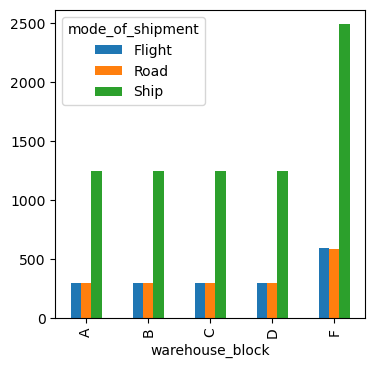

In [143]:
warehouse_shipment.plot(kind='bar', stacked=False, figsize=(4, 4))

### warehouse_block & gender

In [144]:
warehouse_gender= pd.crosstab(df['warehouse_block'], df['gender'])
warehouse_gender


gender,F,M
warehouse_block,,
A,928,905
B,908,925
C,921,912
D,933,901
F,1855,1811


In [145]:
chi2, p, dof, expected = chi2_contingency(warehouse_gender)
chi2, p, dof

(0.8240610292981512, 0.9351935508400288, 4)

<Axes: xlabel='warehouse_block'>

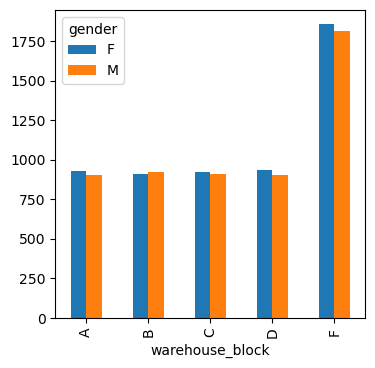

In [146]:
warehouse_gender.plot(kind='bar', stacked=False, figsize=(4, 4) )

### warehouse_product_importance

In [147]:
warehouse_product_importance = pd.crosstab(df['warehouse_block'], df['product_importance'])
warehouse_product_importance

product_importance,high,low,medium
warehouse_block,,,
A,165,909,759
B,146,855,832
C,168,874,791
D,166,883,785
F,303,1776,1587


In [174]:
chi2, p, dof, expected = chi2_contingency(warehouse_product_importance)
chi2, p, dof

(8.058003966006893, 0.42782473410076044, 8)

<Axes: xlabel='warehouse_block'>

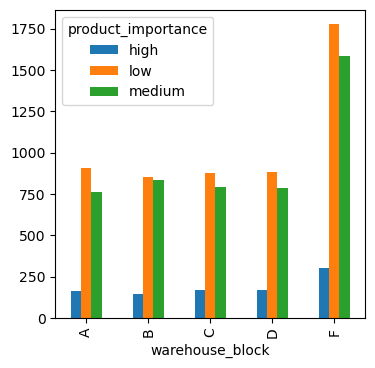

In [149]:
warehouse_product_importance.plot(kind='bar', stacked=False, figsize=(4, 4) )

In [150]:
df.head(2)

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n,cost_of_the_product_cleaned,discount_offered_cleaned,weight_in_gms_cleaned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Medium_cost,Too Much,Light
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Medium_cost,Too Much,Heavy


 ### warehouse_block & cost_of_the_product_cleaned

In [151]:
warehouse_cost_of_the_product_cleaned= pd.crosstab(df['warehouse_block'], df['cost_of_the_product_cleaned'])
warehouse_cost_of_the_product_cleaned

cost_of_the_product_cleaned,High_cost,Medium_cost,low_cost
warehouse_block,,,
A,456,887,490
B,460,951,422
C,481,908,444
D,476,897,461
F,905,1770,991


In [152]:
chi2, p, dof, expected = chi2_contingency(warehouse_cost_of_the_product_cleaned)
chi2, p, dof

(15.408724709595255, 0.051668644997462605, 8)

<Axes: xlabel='warehouse_block'>

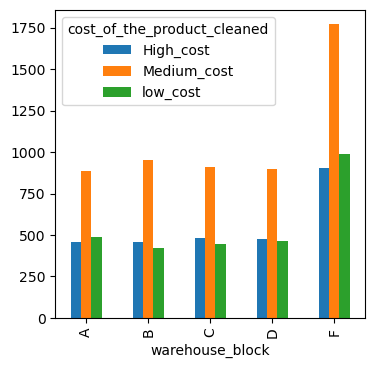

In [175]:
warehouse_cost_of_the_product_cleaned.plot(kind='bar', stacked=False, figsize=(4, 4) )

In [153]:
V = pd.crosstab([df['gender'], df['product_importance']], df['customer_rating'])

V

customer_rating              1    2    3    4    5
gender product_importance                         
F      high                 87   95   93   99   96
       low                 564  510  534  518  526
       medium              498  457  516  479  473
M      high                 99  104   91   94   90
       low                 553  505  520  542  525
       medium              434  494  485  457  461

# NUMERICAL COLUMNS

In [154]:
numerical_columns = ['customer_care_calls', 'cost_of_the_product', 'prior_purchases', 
                  'discount_offered', 'weight_in_gms',"customer_rating",'reached.on.time_y.n' ]
numerical_columns

['customer_care_calls',
 'cost_of_the_product',
 'prior_purchases',
 'discount_offered',
 'weight_in_gms',
 'customer_rating',
 'reached.on.time_y.n']

In [155]:
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,customer_care_calls,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,customer_rating,reached.on.time_y.n
customer_care_calls,1.000000,0.323182,0.180771,-0.130750,-0.276615,0.012209,-0.067126
cost_of_the_product,0.323182,1.000000,0.123676,-0.138312,-0.132604,0.009270,-0.073587
prior_purchases,0.180771,0.123676,1.000000,-0.082769,-0.168213,0.013179,-0.055515
discount_offered,-0.130750,-0.138312,-0.082769,1.000000,-0.376067,-0.003124,0.397108
weight_in_gms,-0.276615,-0.132604,-0.168213,-0.376067,1.000000,-0.001897,-0.268793
customer_rating,0.012209,0.009270,0.013179,-0.003124,-0.001897,1.000000,0.013119
reached.on.time_y.n,-0.067126,-0.073587,-0.055515,0.397108,-0.268793,0.013119,1.000000


In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

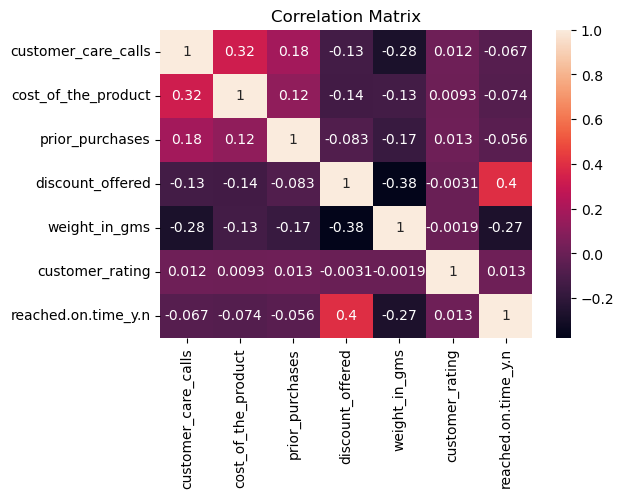

In [157]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True,cmap=None,fmt='.2g' )
plt.title('Correlation Matrix')
plt.show()

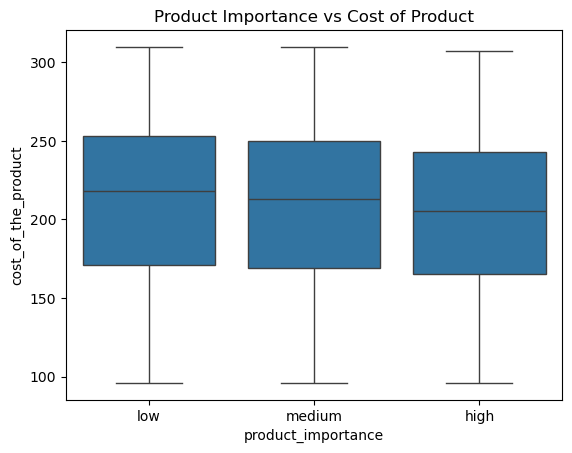

In [158]:
sns.boxplot(data=df, x='product_importance', y='cost_of_the_product')
plt.title('Product Importance vs Cost of Product')
plt.show()

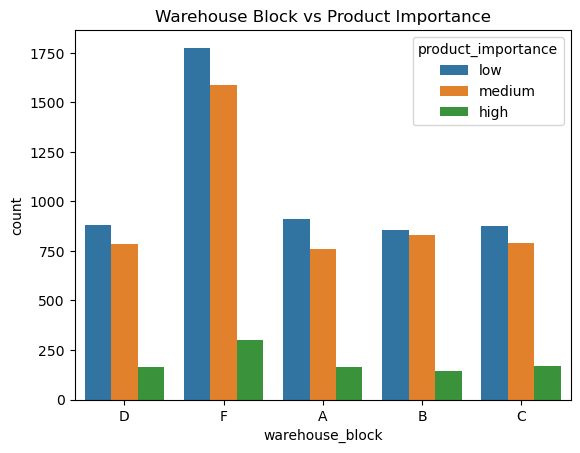

In [159]:
sns.countplot(data=df, x='warehouse_block', hue='product_importance')
plt.title('Warehouse Block vs Product Importance')
plt.show()

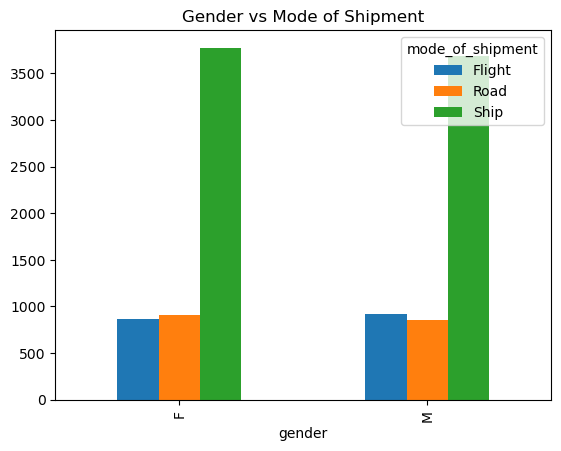

In [160]:
gender_shipment = df.groupby(['gender', 'mode_of_shipment']).size().unstack()
gender_shipment.plot(kind='bar', stacked=False)
plt.title('Gender vs Mode of Shipment')
plt.show()

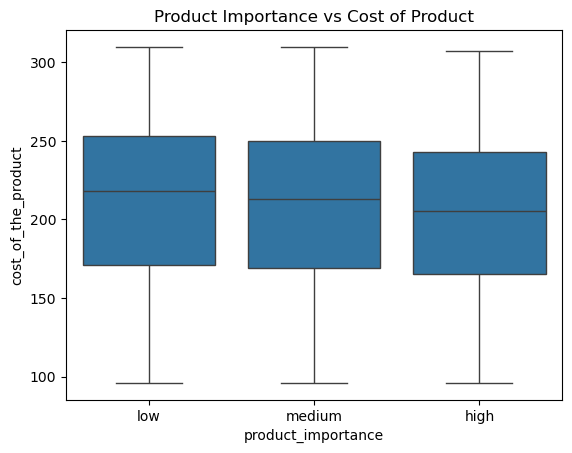

In [161]:
sns.boxplot(data=df, x='product_importance', y='cost_of_the_product')
plt.title('Product Importance vs Cost of Product')
plt.show()

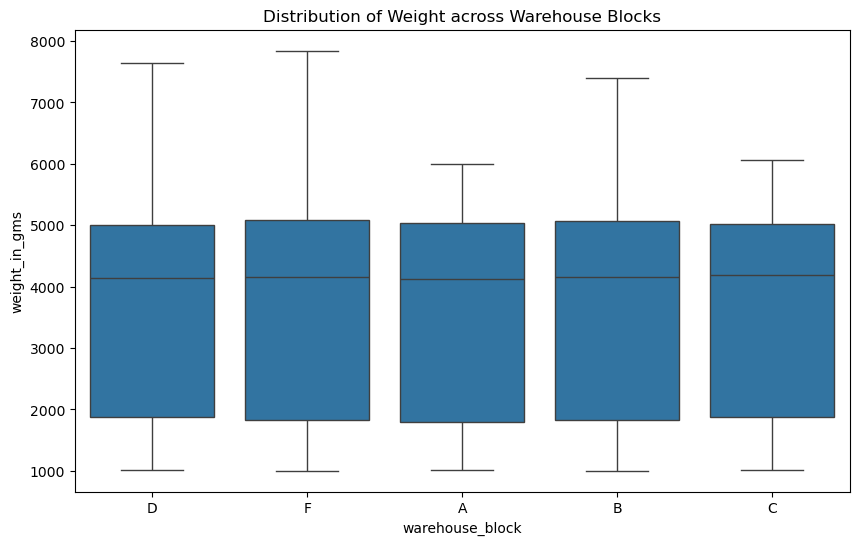

In [162]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='warehouse_block', y='weight_in_gms')
plt.title('Distribution of Weight across Warehouse Blocks')
plt.show()


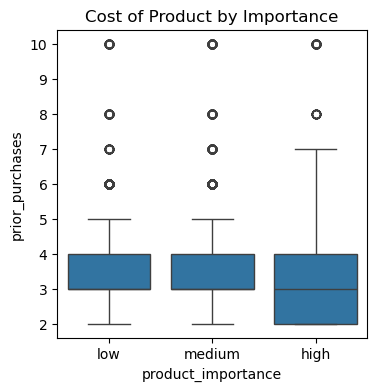

In [163]:
# Box plot for cost_of_the_product_cleaned across product_importance
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='product_importance', y='prior_purchases')
plt.title('Cost of Product by Importance')
plt.show()

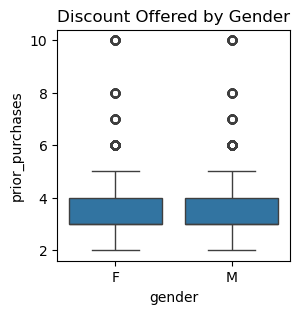

In [164]:
# Box plot for discount_offered_cleaned across gender
plt.figure(figsize=(3, 3))
sns.boxplot(data=df, x='gender', y='prior_purchases')
plt.title('Discount Offered by Gender')
plt.show()

In [165]:
correlation = df[['customer_care_calls', 'customer_rating']].corr()
correlation

,customer_care_calls,customer_rating
customer_care_calls,1.000000,0.012209
customer_rating,0.012209,1.000000


In [166]:
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n', 'cost_of_the_product_cleaned',
       'discount_offered_cleaned', 'weight_in_gms_cleaned'],
      dtype='object')

In [167]:
df.head(2)

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n,cost_of_the_product_cleaned,discount_offered_cleaned,weight_in_gms_cleaned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Medium_cost,Too Much,Light
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Medium_cost,Too Much,Heavy


In [168]:
df[['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n', 'cost_of_the_product_cleaned',
       'discount_offered_cleaned','weight_in_gms_cleaned']].to_csv("Ecommerce_Product_Data_Cleaned.csv",index=False)

 ### relation with on time

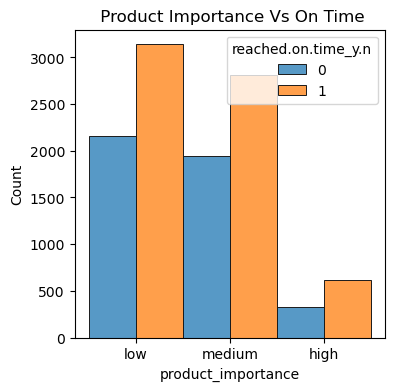

In [169]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df, x='product_importance', hue='reached.on.time_y.n', multiple='dodge', edgecolor=".1", linewidth=.7 )
plt.title(' Product Importance Vs On Time')
plt.show()

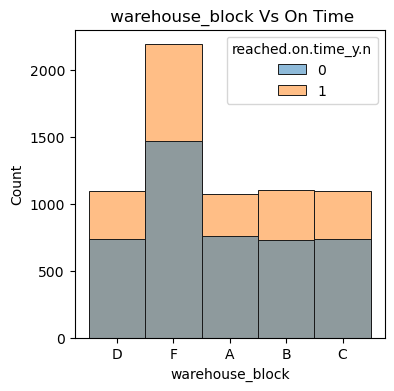

In [170]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df, x='warehouse_block', hue='reached.on.time_y.n', multiple='layer', edgecolor=".1", linewidth=.7 )
plt.title(' warehouse_block Vs On Time')
plt.show()